**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'

/home/dhiman/Miniconda2/envs/westpa-2017.10/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.
Reanalyzing file assign.h5 for scheme TEST.
Reanalyzing file direct.h5 for scheme TEST.
Reanalyzing file reweight.h5 for scheme TEST.

Complete!
Setting iteration to iter 200.


In [2]:
#=====================================================================
#CALCULATING LIFETIME FOR MILESTONES
#=====================================================================
total_iteration = 200

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink = -1.0

lifetime = 0.0
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 21
    
    for j in range(len(l)):
        
            
        if l[j][0] < sink and l[j][tau-1] >= sink:
            it[i] += wts[j]
            for k in range(tau):
                if l[j][k] < sink and l[j][k+1] >= sink:
                    flux += wts[j]/float(i*tau+k)
                    lifetime += wts[j]*(i*tau+k)
    flux_array.append(flux)
    
print "MFPT = ", 1./flux     
print "lifetime = ", lifetime/sum(it)
print sum(it)
print sum(it)/flux
#----------------------------------------
#Printing milestone data in file
#----------------------------------------
f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability"
print >>f1, 1./flux, 0.0, lifetime/(sum(it)), 1.0, 0.0
f1.close()

Setting iteration to iter 1.
Setting iteration to iter 2.
Setting iteration to iter 3.
Setting iteration to iter 4.
Setting iteration to iter 5.
Setting iteration to iter 6.
Setting iteration to iter 7.
Setting iteration to iter 8.
Setting iteration to iter 9.
Setting iteration to iter 10.
Setting iteration to iter 11.
Setting iteration to iter 12.
Setting iteration to iter 13.
Setting iteration to iter 14.
Setting iteration to iter 15.
Setting iteration to iter 16.
Setting iteration to iter 17.
Setting iteration to iter 18.
Setting iteration to iter 19.
Setting iteration to iter 20.
Setting iteration to iter 21.
Setting iteration to iter 22.
Setting iteration to iter 23.
Setting iteration to iter 24.
Setting iteration to iter 25.
Setting iteration to iter 26.
Setting iteration to iter 27.
Setting iteration to iter 28.
Setting iteration to iter 29.
Setting iteration to iter 30.
Setting iteration to iter 31.
Setting iteration to iter 32.
Setting iteration to iter 33.
Setting iteration t

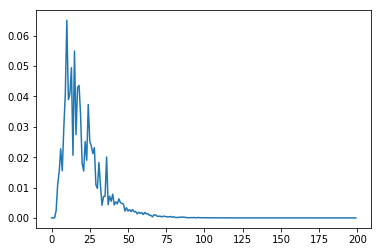

In [3]:
#plot lifetime distribution
plt.plot(it)

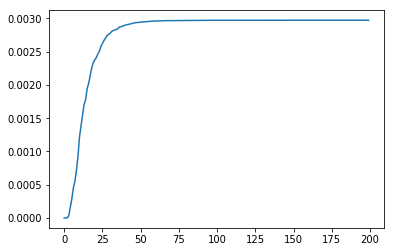

In [4]:
#check convergence
plt.plot(flux_array)

In [5]:
print it
f1 = open('FPTD.dat','w')

for i in range(len(it)):
    print >>f1, i*tau, it[i]
    
f1.close()

[0.0, 0.0, 0.0, 0.002388888888888889, 0.011020541549953312, 0.015146617906421833, 0.02277046114742193, 0.015518139848532004, 0.029427652418992298, 0.04073422195088862, 0.06509923836451614, 0.03893365979266033, 0.040876733639151924, 0.04949258838474527, 0.020646554198218665, 0.05495743636591494, 0.027415022670147036, 0.04296886891774862, 0.04362443900629799, 0.03362283358451378, 0.018024442793779863, 0.015428515975601985, 0.025162300869054213, 0.01898643368250031, 0.037350099805556855, 0.02524873968767213, 0.023700636857213506, 0.0211552387973964, 0.023135380415854577, 0.010915454838798475, 0.009711664387480496, 0.018252045905958834, 0.010603531836262614, 0.00414654234493512, 0.007105475983507649, 0.007096535422872793, 0.02004346851068319, 0.0043495111847526, 0.007143782612551396, 0.005506058906721744, 0.007812495680131431, 0.00425775471203899, 0.005293963137048558, 0.004638429892659397, 0.006292173650631763, 0.005059690771650053, 0.004814339314942073, 0.004534050090125328, 0.0022551865